<font size="5">**<center> Predicting customer satisfaction for a business**</font>

# Introduction

The objective of this project is to develop a model that predicts whether a customer review is positive or negative.

# Business Problem

Determining whether customers are satisfied with a company’s products and services is very important. One way of achieving this is by using a model to classify whether their reviews for the company’s product and services are positive, or negative. Knowing such information can help a company identify what is lacking and guide it to improvement. Therefore, this topic is relevant to all businesses.

# Dataset

To achieve the objective of this project, the Amazon fine food reviews dataset will be used. This data can be found at the following location:

https://www.kaggle.com/snap/amazon-fine-food-reviews

The dataset consists of reviews of fine foods from Amazon, and it has more than ten years of data with more than 500,000 reviews. The reviews include product, user information, ratings, and a plain text review. 


## Importing Libraries

In [1]:
# Importing the necessary library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
import string
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing 
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,
                             recall_score,f1_score)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import pickle
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [2]:
# Loading the Amazon fine food reviews dataset.
reviews_df = pd.read_csv('D:/Training/Bellevue/Applied Data Science/Data/Reviews.csv')

## Data Exploration

In [3]:
# Checking the first five rows.
reviews_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


The above output shows the first five rows and all the features of the dataset.

In [4]:
# Checking last five rows
reviews_df.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


The above output shows the last five rows and all the features of the dataset.

In [5]:
# Checking the dimension of the data
reviews_df.shape

(568454, 10)

The dataset has 10 features and over a half million reviews. This is consistent with the description of the dataset from the source(i.e Kaggle). Therefore, the dataset was correctly loaded.

In [6]:
# Checking the information in the dataset
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


Based on the output above, dataset has the following features:

- ProductId : Unique identifier for the product
- UserId : Unqiue identifier for the user
- ProfileName : Name of customer
- HelpfulnessNumerator : Number of users who found the review helpful
- HelpfulnessDenominator : Number of users who indicated whether they found the review helpful or not
- Score : Rating between 1 and 5
- Time : Timestamp for the review
- Summary : Brief summary of the review
- Text : Review text
    

### Missing value Analysis and Treatment

In [7]:
#Checking missing values
reviews_df.isna().sum().to_frame(name='Number of missing value')

,Number of missing value
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


As shown above, all features do not have missing values except for the profile name and summary features. These missing values will be removed from the dataset.

In [8]:
# Creating a function to remov missing values.
def removing_missing_values(data):
    total_rows = data.shape[0]
    data.dropna(how='any', inplace=True)
    remaining_rows= data.shape[0]
    removed_rows = total_rows - remaining_rows
    print("No. of rows removed :", removed_rows)
    print(f"Percentage of data removed:{np.round((removed_rows/total_rows)*100,2)}%")
    print(f"Percentage of data remaining:{np.round((remaining_rows/total_rows)*100,2)}%")
    print('Dataframe below shows that dataset after treating missing values: ')
    return data

In [9]:
removing_missing_values(reviews_df)

No. of rows removed : 53
Percentage of data removed:0.01%
Percentage of data remaining:99.99%
Dataframe below shows that dataset after treating missing values: 


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [10]:
#Checking missing values again
reviews_df.isna().sum().to_frame(name='Number of missing value')

,Number of missing value
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


The data is now free from missing values.

### Duplicate rows and treatment

In [11]:
# Checking number of duplicates reviews and score.
duplicates = reviews_df.duplicated(subset=['Score','Text'], keep='first').sum()
print("Number of duplicates which should be removed: ", duplicates)

Number of duplicates which should be removed:  174745


In [12]:
# Creating a function to remove duplicates.
def removing_duplicates(data):
    total_rows =  data.shape[0]
    data.drop_duplicates(inplace=True, subset=['Score','Text'])
    remaining_rows = data.shape[0]
    print("No. of rows removed :", total_rows-remaining_rows)
    print(f"Percentage of data removed: {np.round(((total_rows-remaining_rows)/total_rows)*100,2)}%")
    print(f"Percentage of data remaining: {np.round((remaining_rows/total_rows)*100,2)}%")
    print("The dataframe below shows the dataset after removing duplicates:")
    return data

In [13]:
removing_duplicates(reviews_df)

No. of rows removed : 174745
Percentage of data removed: 30.74%
Percentage of data remaining: 69.26%
The dataframe below shows the dataset after removing duplicates:


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [14]:
# Checking number of duplicates reviews and score again.
duplicates = reviews_df.duplicated(subset=['Score','Text'], keep='first').sum()
print("Number of duplicates which should be removed: ", duplicates)

Number of duplicates which should be removed:  0


The duplicates have been successfully removed.

### Outlier Analysis and treatment

An outlier is an unusual observation in the context of this project. The data includes the HelpfulnessNumerator and HelpfulnessDenominator features. The helpfulnessNumerator is the number of users who found the review helpful
 whereas the HelpfulnessDenominator is Number of users who indicated whether they found the review helpful or not. Logically, HelpfulnessNumerator should not be greater than HelpfulnessDenominator. Thus, all observations which have HelpfulnessNumerator that is greater than HelpfulnessDenominator is unusual and will be flagged as an outlier.

In [15]:
# Checking the number of outliers.
outliers = reviews_df[reviews_df["HelpfulnessNumerator"]>reviews_df["HelpfulnessDenominator"]].index
print('Number of outliers which should be removed:', len(outliers))

Number of outliers which should be removed: 2


In [16]:
# Removing Outliers
total_rows =  reviews_df.shape[0]
reviews_df.drop(index=outliers, inplace=True)
remaining_rows = reviews_df.shape[0]
print("No. of rows removed :", total_rows-remaining_rows)

No. of rows removed : 2


In [17]:
# Checking the number of outliers again
outliers = reviews_df[reviews_df["HelpfulnessNumerator"]>reviews_df["HelpfulnessDenominator"]].index
print('Number of outliers which should be removed:', len(outliers))

Number of outliers which should be removed: 0


All outliers have been removed.

## Creating the target column

Each review in the dataset has an associated score(or rating) that ranges from 1 to 5. In this project , the goal is to predict whether the review is positive or negative. The target column will be defined as follows:

`Score` > 3 : "Positive" 
 
`Score` <= 3 : "Negative"

In [18]:
# Funtion to create the target column.
def create_target(x):
    return "Positive" if x>3 else "Negative"

In [19]:
# Applying the function on the score column
reviews_df.loc[:, 'target'] = reviews_df['Score'].apply(create_target)

In [20]:
# Checking the target is successfully created looking 15 randomly selected observation
reviews_df[['Score', 'target']].sample(15)

,Score,target
444725,5,Positive
196213,5,Positive
174684,4,Positive
116207,5,Positive
8944,5,Positive
91267,5,Positive
344035,5,Positive
140524,4,Positive
326246,5,Positive
308416,2,Negative


Based on the output above, the target has been successfully created. Each score maps to the correct target label.

### Distribution of the target

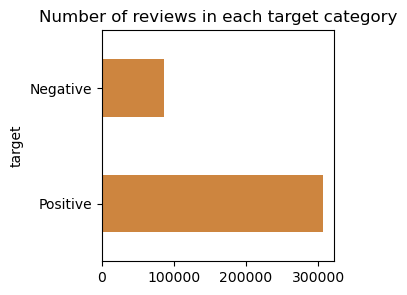

In [21]:
# Calculating number of reviews in each target category
counts = reviews_df['target'].value_counts()

# Plotting the target categories.
figsize = (4,4)
counts.plot(kind='barh', title="Number of reviews in each target category",
            color = 'peru',
            figsize = (3,3));

Most of the reviews are positive. Therefore, our data is biased towards positive reviews. This is a problem called class imbalance. Why would this be problematic? With so few negative reviews relative to positive reviews, the training model will spend most of its time on positive examples and not learn enough from negative reviews.As a consequence, it will not be easily be able to detect negative reviews when implemented. To migate this risk, the downsampling technique is going to be used. The technique is performed by randomly sampling the majority class in order to get the number of observations that matches the number of observations in the  minority class.

### Downsampling

In [22]:
# Outputing the counts of the target labels.
counts

target
Positive    306805
Negative     86849
Name: count, dtype: int64

The negative class is the minority with 86849 observations. Therefore , the positive classe will be undersampled so that its number of observations matches the number of observations in the minority class i.e 86849 observations will be sampled from the positve.

In [23]:
# Sampling 86849 observations from the positive class

positive = reviews_df.loc[reviews_df.target=="Positive"].sample(86849)

negative = reviews_df.loc[reviews_df.target=="Negative"]

reviews_df = pd.concat([positive, negative])
reviews_df.shape

(173698, 11)

#### Target distribution after Downsampling

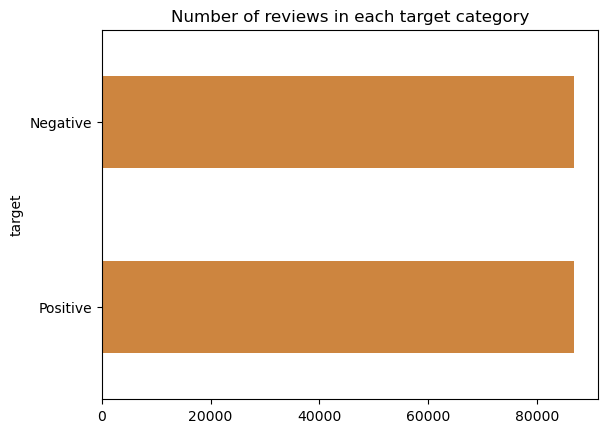

In [24]:
# Calculating number of reviews in each target category after downsampling
counts = reviews_df['target'].value_counts()

# Plotting the target categories after downsampling
counts.plot(kind='barh', title="Number of reviews in each target category",
            color = 'peru');

# Text Preprocessing

Text Processing is an essential task in NLP as it helps to clean and transform raw data into a suitable format used for analysis or modeling.In this project the Text column(or actual amazon reviews) will be preprocessed in order to make them appropriate for modelling by accompishing the following tasks:

- Removing HTML tags - These would not add value in determining whether or not a customer is satisfied.

- Removing punction marks - We remove punctuations so that we don’t have different forms of the same word. If we don’t remove the punctuation, then been. been, been! will be treated separately.

- Remove digits - These are not text and they would add value in determing the emotion of a customer.

- Lowercasing - We lowercase the text to reduce the size of the vocabulary of our text data.

- Remove extra spaces - These are to be removed because they often signal inconsistent data input.

- Remove stop words - By removing these words, we remove the low-level information from our text in order to give more focus to the important information.

- Stemming - Stemming is a technique used to reduce an inflected word down to its word stem. For example, the words “programming,” “programmer,” and “programs” can all be reduced down to the common word stem “program. By transforming words to their stems, NLP models can treat different forms of the same word as a single entity, reducing the complexity of the text data.

The objects to perform all the above tasks will now be created. 

In [25]:
# Identifying html tags to be removed.
HTMLTAGS = re.compile('<.*?>')

# Identifying punctuation marks to be removed
table = str.maketrans(dict.fromkeys(string.punctuation))

# Creating an object for digits to be removed.
remove_digits = str.maketrans('', '', string.digits)

#Creating an object to remove multiple spaces
multiple_spaces = re.compile(r"\s+")

#Creating a stemming object
stemmer = PorterStemmer()

# Creating a list of stop words to be removed.
total_stopwords = set(stopwords.words('english'))

# subtract negative stop words like no, not, don't etc.. from total_stopwords
negative_stop_words = set(word for word in total_stopwords 
                          if "n't" in word or 'no' in word)

final_stopwords = total_stopwords - negative_stop_words

final_stopwords.add("one")


In [26]:
# Checking the list of stop words
print(final_stopwords)

{'before', 'most', 'itself', 'because', 'themselves', 'yourself', 'don', 'or', 're', 'off', 'as', 'then', 'couldn', 'with', "you've", 'o', 'should', 'did', 'of', 'whom', 'just', 'shan', 'so', 'which', 'its', 'herself', 'and', 'one', 'any', 'his', 'who', 'when', 'been', 'll', "she's", 'your', 'if', 'above', 'up', 'me', 'they', 'both', 'doing', 'in', "it's", 'myself', 'while', "you'll", 'here', 'wasn', 'few', 'her', 'those', 'isn', 'yourselves', 'ma', 'through', 'during', 'won', 'is', 'haven', 'between', 've', 'into', 'by', 'shouldn', 'the', 'does', 'will', 'were', 'after', 'i', 'such', 'can', 'hadn', 'for', 'where', 'about', 'do', 'doesn', 'has', 'an', 'more', 't', 'weren', 'their', 'there', 'same', 'mustn', "you're", 'my', 'mightn', 'ourselves', 'on', 'each', 'below', 's', 'once', 'ours', 'be', 'until', 'himself', 'was', 'this', 'ain', 'why', 'hers', "that'll", 'these', 'from', 'had', 'further', 'some', 'all', 'he', 'd', 'only', 'wouldn', 'are', 'than', 'down', 'aren', 'him', 'how', 'y

## Text Preprocessor function

Now a function which removes all the above issues which could affect the text's appropriateness for modelling will be created.

In [27]:
def text_preprocessor(review):
    # remove html tags
    review = HTMLTAGS.sub(r'', review)

    # remove puncutuation
    review = review.translate(table)
    
    # remove digits
    review = review.translate(remove_digits)
    
    # lower case all letters
    review = review.lower()
    
    # replace multiple white spaces with single space
    review = multiple_spaces.sub(" ", review).strip()
    
    # remove stop words
    review = [word for word in review.split()
              if word not in final_stopwords]
    
    # Stemming the words
    review = ' '.join([stemmer.stem(word) for word in review])
    
    return review

In [28]:
# Displaying one review before applying the preprocessing function to see how it looks.
print("Review # 10 before preprocessing : ")
reviews_df["Text"].iloc[10]

Review # 10 before preprocessing : 


'bought these blindly via the military commissary system while living overseas and seeking out gluten free pasta.  These are corn based, not rice based.  Had never heard of the brand before trying them.  What a find.  These noodles are wonderful.  So flavorful its hard to believe they are gluten free.  Sent some via Amazon online to my dad who also must eat gluten free and he loved them.  My niece ate over at his house one night and still raves about the meal Grandpa made with these fettucine noodles.  She asked where she could buy them and she is a wheat eater--that tells you something about the quality and taste of this product.  A year later she still talks about that meal and these fettucine noodles...'

In [29]:
# Applying the text preprocessing function.
reviews_df['Text'] = reviews_df['Text'].apply(text_preprocessor)

In [30]:
# Displaying review #10 after applying the preprocessing function to see how it looks.
print("Review # 10 before preprocessing : ")
reviews_df["Text"].iloc[10]

Review # 10 before preprocessing : 


'bought blindli via militari commissari system live oversea seek gluten free pasta corn base not rice base never heard brand tri find noodl wonder flavor hard believ gluten free sent via amazon onlin dad also must eat gluten free love niec ate hous night still rave meal grandpa made fettucin noodl ask could buy wheat eaterthat tell someth qualiti tast product year later still talk meal fettucin noodl'

As shown above, stemming, punctuation removal, stop word remove, lowercasing were all successfully applied. The Text preprocessor is functioned as expected.

## Text Visualization

A word cloud is a simple and popular way to visualize the most frequent words in a text data set. It shows the words as different sizes and colors, depending on their frequency or importance. Now we will create word clouds for all two categories of the target variable.

In [31]:
# Creating the function to generate the word cloud.

def generate_wordcloud(text):
    stopwords = set(STOPWORDS)
    
    wordcloud = WordCloud(stopwords=stopwords, background_color='white')
    wordcloud.generate(text)
    
    plt.figure(figsize=(15,7))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show()

    Word Cloud for Positive Reviews

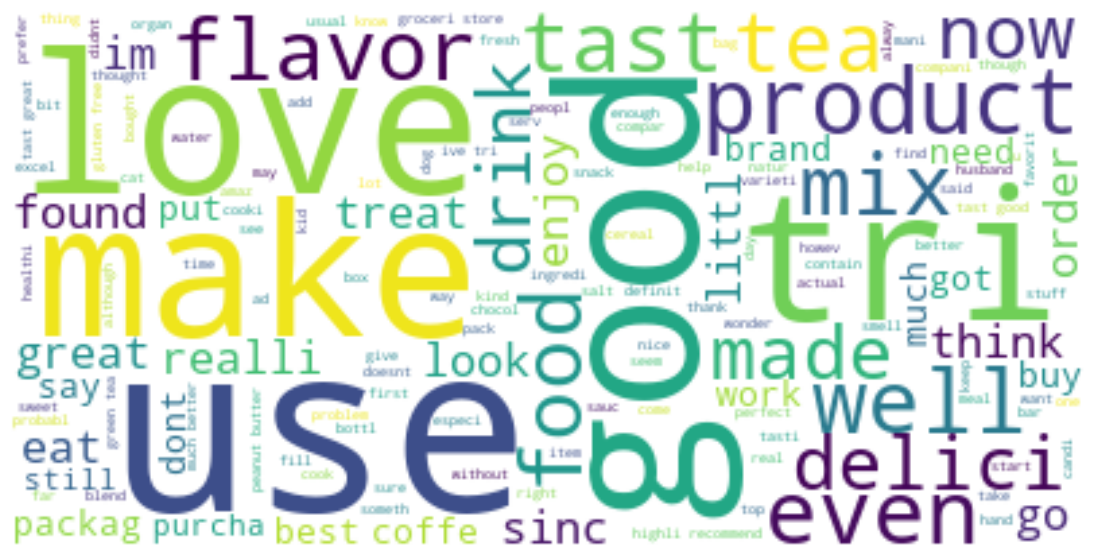

In [32]:
# Filtering out positive reviews from the entire dataset
positive = reviews_df.loc[reviews_df.target=="Positive"].Text
text = " ".join(review for review in positive.astype(str))

# Generating the word cloud
generate_wordcloud(text)

Love, good, great,and use are examples of frequent words in the above visualization for positvie reviews.

Use, tast , seem, good and love are examples of frequent words among neutral reviews.

    Word Cloud for negative reviews

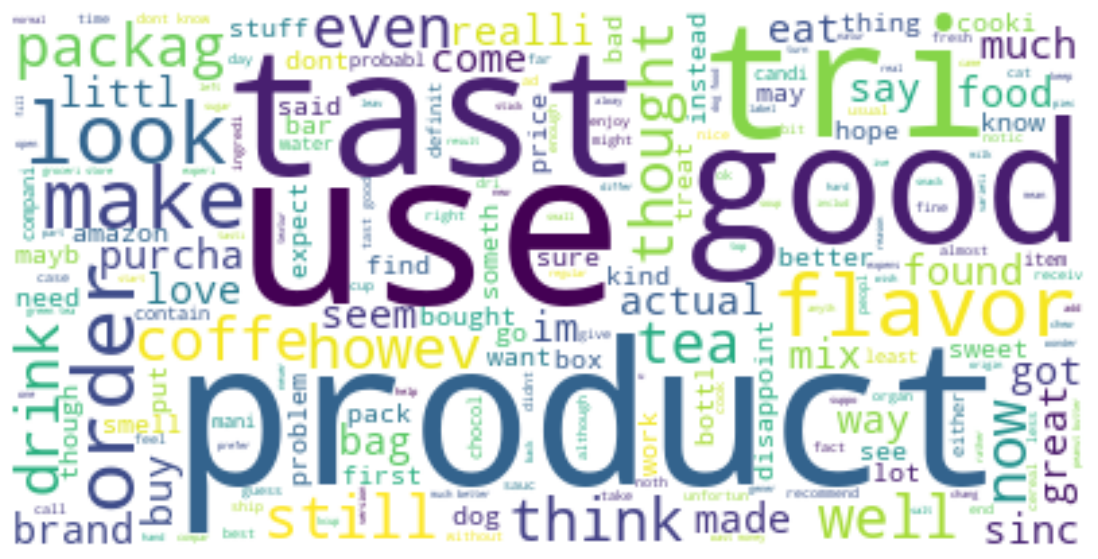

In [33]:
# Filtering out negative reviews from the entire dataset
negative = reviews_df.loc[reviews_df.target=="Negative"].Text
text = " ".join(review for review in negative.astype(str))

# Generating the word cloud
generate_wordcloud(text)

Good, use, product and tast are examples of frequent words among negative reviews.

# Model Building

## Data partition

An 80/20 percent split will be used to partition the data in order to have more data in the training set.

In [34]:
# Extracting reviews from the dataset.
features = reviews_df['Text']

# Extracting the target from the dataset.
target = reviews_df['target']

In [35]:
# Splitting data into training and test sets.
train_features, test_features,train_target,test_target = train_test_split(features, 
                                                                          target, 
                                                                          test_size=0.2,
                                                                          random_state=1,
                                                                          stratify=target)

## Vectorization

Vectorization is a jargon in ML for a classic approach of converting input data from its raw format (i.e. text ) into vectors of real numbers which is the format that ML models support. There are a number of vectorization techniques but in this project we are going to test two: Bag of Words and TF-IDF. Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

### Bag of Words(BOW) vectorization

In [36]:
# Initiating the count vectorizer which will be used to perform BOW vectorization
bow_vectorizer = CountVectorizer(max_features=10000)

# Fitting the vectorizer on the training features
bow_vectorizer.fit(train_features)

# Applying the vectorizer both on the training and test features.
bow_train_features = bow_vectorizer.transform(train_features)
bow_test_features = bow_vectorizer.transform(test_features)

### TF-IDF Vectorizerization

In [37]:
# Initiating the tf-idf vectorizer which will be used to perform tf-idf vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Fitting the vectorizer on the training features
tfidf_vectorizer.fit(train_features)

# Applying the vectorizer both on the training and test features.
tfidf_train_features = tfidf_vectorizer.transform(train_features)
tfidf_test_features = tfidf_vectorizer.transform(test_features)

## Label Encoding

Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project. In this project, target categories will also be encoded so that they can be appropriate for modelling.

In [38]:
# Initiatinh the lable encoder object that will be used to encode labels or categories of the target.
# The label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Fitting the encoder on the training targets.
train_target = label_encoder.fit_transform(train_target)

# Applying the encoder on the test_target.
test_target = label_encoder.transform(test_target)

# Printing the encoded labels
labels = label_encoder.classes_.tolist()
print(labels)

['Negative', 'Positive']


## Training

In [39]:
# Creating function to train the model and output performance metrics
def train_and_evaluation(model, training_features, training_target, testing_features, testing_target):

    # training the model
    _ = model.fit(training_features, training_target)

    # Generating Predictions on training and testing sets.
    preds_on_train = model.predict(training_features)
    preds_on_test = model.predict(testing_features)

    # Model performance evaluation o
    print()
    print(model)
    print(f"Accuracy score on training set : {round(accuracy_score(training_target, preds_on_train),2)*100}","%")
    print(f"Accuracy score on testing set  : {round(accuracy_score(testing_target, preds_on_test),2)*100}","%")
    print(f"F - 1 score on training set    : {round(f1_score(training_target, preds_on_train, average='macro'),2)*100}","%")
    print(f"F - 1 score on testing set     : {round(f1_score(testing_target, preds_on_test,  average='macro'),2)*100}","%")
    print('\n',60*'-')

### Logistic Regression using BOW

In [40]:
# Creating hyperparameters
C = [0.001, 0.01, 0.1, 1, 10]

# Looping through each hyperparameter and creating a model for each.
for c in C: 
    # Defining logistic regression model object
    lr_model = LogisticRegression(C=c, max_iter=10000, random_state=1)
    
    # Training and evaluating the logistic regression model
    train_and_evaluation(model=lr_model,
                         training_features=bow_train_features,
                         training_target=train_target,
                         testing_features=bow_test_features,
                         testing_target=test_target)


LogisticRegression(C=0.001, max_iter=10000, random_state=1)
Accuracy score on training set : 83.0 %
Accuracy score on testing set  : 82.0 %
F - 1 score on training set    : 83.0 %
F - 1 score on testing set     : 82.0 %

 ------------------------------------------------------------

LogisticRegression(C=0.01, max_iter=10000, random_state=1)
Accuracy score on training set : 85.0 %
Accuracy score on testing set  : 84.0 %
F - 1 score on training set    : 85.0 %
F - 1 score on testing set     : 84.0 %

 ------------------------------------------------------------

LogisticRegression(C=0.1, max_iter=10000, random_state=1)
Accuracy score on training set : 87.0 %
Accuracy score on testing set  : 85.0 %
F - 1 score on training set    : 87.0 %
F - 1 score on testing set     : 85.0 %

 ------------------------------------------------------------

LogisticRegression(C=1, max_iter=10000, random_state=1)
Accuracy score on training set : 87.0 %
Accuracy score on testing set  : 84.0 %
F - 1 score on

### Logistic Regression using Tf-idf

In [41]:
# Creating hyperparameters
C = [0.001, 0.01, 0.1, 1, 10]

# Looping through each hyperparameter and creating a model for each.
for c in C: 
    # Defining logistic regression model object
    lr_model = LogisticRegression(C=c, max_iter=10000, random_state=1)
    
    # Training and evaluating the logistic regression model
    train_and_evaluation(model=lr_model,
                         training_features=tfidf_train_features,
                         training_target=train_target,
                         testing_features=tfidf_test_features,
                         testing_target=test_target)


LogisticRegression(C=0.001, max_iter=10000, random_state=1)
Accuracy score on training set : 80.0 %
Accuracy score on testing set  : 80.0 %
F - 1 score on training set    : 80.0 %
F - 1 score on testing set     : 80.0 %

 ------------------------------------------------------------

LogisticRegression(C=0.01, max_iter=10000, random_state=1)
Accuracy score on training set : 82.0 %
Accuracy score on testing set  : 82.0 %
F - 1 score on training set    : 82.0 %
F - 1 score on testing set     : 82.0 %

 ------------------------------------------------------------

LogisticRegression(C=0.1, max_iter=10000, random_state=1)
Accuracy score on training set : 85.0 %
Accuracy score on testing set  : 84.0 %
F - 1 score on training set    : 85.0 %
F - 1 score on testing set     : 84.0 %

 ------------------------------------------------------------

LogisticRegression(C=1, max_iter=10000, random_state=1)
Accuracy score on training set : 87.0 %
Accuracy score on testing set  : 85.0 %
F - 1 score on

### Naive Bayes Classifier using BOW

In [42]:
# Creating hyperparameters
alphas = [0, 0.2, 0.6, 0.8, 1]

# Looping through each hyperparameter and creating a model for each.
for a in alphas: 
    # Defining naive bayes model object
    nb_model = nb_model = MultinomialNB(alpha=a)
    
    # Training and evaluating the logistic regression model
    train_and_evaluation(model=nb_model,
                         training_features=bow_train_features,
                         training_target=train_target,
                         testing_features=bow_test_features,
                         testing_target=test_target)


MultinomialNB(alpha=0)
Accuracy score on training set : 84.0 %
Accuracy score on testing set  : 83.0 %
F - 1 score on training set    : 84.0 %
F - 1 score on testing set     : 83.0 %

 ------------------------------------------------------------


C:\Users\kps-a\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\kps-a\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(



MultinomialNB(alpha=0.2)
Accuracy score on training set : 84.0 %
Accuracy score on testing set  : 83.0 %
F - 1 score on training set    : 84.0 %
F - 1 score on testing set     : 83.0 %

 ------------------------------------------------------------

MultinomialNB(alpha=0.6)
Accuracy score on training set : 84.0 %
Accuracy score on testing set  : 83.0 %
F - 1 score on training set    : 84.0 %
F - 1 score on testing set     : 83.0 %

 ------------------------------------------------------------

MultinomialNB(alpha=0.8)
Accuracy score on training set : 84.0 %
Accuracy score on testing set  : 83.0 %
F - 1 score on training set    : 84.0 %
F - 1 score on testing set     : 83.0 %

 ------------------------------------------------------------

MultinomialNB(alpha=1)
Accuracy score on training set : 84.0 %
Accuracy score on testing set  : 83.0 %
F - 1 score on training set    : 84.0 %
F - 1 score on testing set     : 83.0 %

 ------------------------------------------------------------


### Naive Bayes Classifier using Tf-idf

In [43]:
# Creating hyperparameters
alphas = [0, 0.2, 0.6, 0.8, 1]

# Looping through each hyperparameter and creating a model for each.
for a in alphas: 
    # Defining naive bayes model object
    nb_model = nb_model = MultinomialNB(alpha=a)
    
    # Training and evaluating the logistic regression model
    train_and_evaluation(model=nb_model,
                         training_features=tfidf_train_features,
                         training_target=train_target,
                         testing_features=tfidf_test_features,
                         testing_target=test_target)


MultinomialNB(alpha=0)
Accuracy score on training set : 84.0 %
Accuracy score on testing set  : 82.0 %
F - 1 score on training set    : 84.0 %
F - 1 score on testing set     : 82.0 %

 ------------------------------------------------------------


C:\Users\kps-a\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\kps-a\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(



MultinomialNB(alpha=0.2)
Accuracy score on training set : 83.0 %
Accuracy score on testing set  : 82.0 %
F - 1 score on training set    : 83.0 %
F - 1 score on testing set     : 82.0 %

 ------------------------------------------------------------

MultinomialNB(alpha=0.6)
Accuracy score on training set : 84.0 %
Accuracy score on testing set  : 82.0 %
F - 1 score on training set    : 84.0 %
F - 1 score on testing set     : 82.0 %

 ------------------------------------------------------------

MultinomialNB(alpha=0.8)
Accuracy score on training set : 84.0 %
Accuracy score on testing set  : 82.0 %
F - 1 score on training set    : 84.0 %
F - 1 score on testing set     : 82.0 %

 ------------------------------------------------------------

MultinomialNB(alpha=1)
Accuracy score on training set : 84.0 %
Accuracy score on testing set  : 82.0 %
F - 1 score on training set    : 84.0 %
F - 1 score on testing set     : 82.0 %

 ------------------------------------------------------------


# Best Model 

The logistic regression model(c=0.1) applied to the data that was vectorized using the tf-idf technique was chosen as the best model to predict whether a customer review is positive, or negative. This was chosen as the best model because it has high performance metrics, does not severely overfit the data and is easy to implement.

## Additional Evaluation of best model

In [44]:
# Function to plot confusion metrix
def conf_matrix(actual,predictions):
    " This function calculates the accuracy score and displays it on the confusion matrix"
    # Calculating accuracy score
    score = round(accuracy_score(actual,predictions),4)*100
    
    # Creating confusion matrix.
    confusion_matrix = metrics.confusion_matrix(actual, predictions,normalize='true')
    
    # Displaying confusion matrix.
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'twilight',
               xticklabels=labels, yticklabels=labels);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score as a % : {0}'.format(score)
    plt.title(all_sample_title, size = 10);

In [45]:
# refitting the best model.
best_model = LogisticRegression(C=0.1, max_iter=10000, random_state=1)
best_model.fit(tfidf_train_features,train_target)

LogisticRegression(C=0.1, max_iter=10000, random_state=1)

In [46]:
# Generate predictions
predictions_train = best_model.predict(tfidf_train_features)
predictions_test = best_model.predict(tfidf_test_features)

 Accuracy

In [47]:
print(f"Train accuracy score : {accuracy_score(train_target, predictions_train)}")
print(f"Test accuracy score : {accuracy_score(test_target, predictions_test)}")

Train accuracy score : 0.8478820938700903
Test accuracy score : 0.8428612550374208


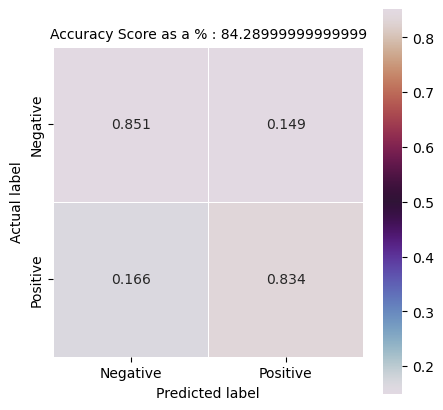

In [48]:
conf_matrix(test_target,predictions_test)

The model is doing well in classifying both the negative and positive reviews.

## Testing the model with sample reviews

In [49]:
# labels = ['Negative', 'Positive']
def get_sentiment(review):
    # preprocessing
    x = text_preprocessor(review)
    #vectorization
    x = tfidf_vectorizer.transform([x])
    #prediction
    y = int(best_model.predict(x.reshape(1,-1)))
    return labels[y]

In [50]:
# Sample review 1
review = "This product is nice"
print(f"This is a {get_sentiment(review)} review!")

This is a Positive review!


In [51]:
# Sample review 2
review = "I recommend this product"
print(f"This is a {get_sentiment(review)} review!")      
            

This is a Positive review!


In [52]:
# Sample review 3
review = "I will not buy this product again"
print(f"This is a {get_sentiment(review)} review!") 

This is a Negative review!


In [53]:
# Sample review 4
review = "The product lacks quality"
print(f"This is a {get_sentiment(review)} review!") 

This is a Negative review!


The model made correct predictions.

# Deployment

In [54]:
# Saving the model and tfidf vectorizer as pickle files for deployment in Heroku
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)
    
with open("model.pkl", "wb") as f:
    pickle.dump(best_model, f)

Web app and deployment code will be available soon on my github:

https://github.com/Masange/customer_satisfaction_detector/tree/master

***End of model development code***